# <p style="padding:10px;background-color:#2b2d42;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">House Price on Divar</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   


    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#0f4c5c"> Importing Libraries</font>](#1)                   |8   | [<font color="#0f4c5c"> Address</font>](#8)   |     
|2   | [<font color="#0f4c5c"> Importing Dataset</font>](#2)                         |9  | [<font color="#0f4c5c"> Visualization</font>](#9)|      
|3   | [<font color="#0f4c5c"> PreProcessing</font>](#3)                     |10  | [<font color="#0f4c5c">Modeling</font>](#10)   |    
|4   | [<font color="#0f4c5c"> Room</font>](#4)                             
|5   | [<font color="#0f4c5c"> Parking</font>](#5)           
|6   | [<font color="#0f4c5c"> Warehouse</font>](#6)                  
|7   | [<font color="#0f4c5c"> Elevator</font>](#7)              

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>   


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as dg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from yellowbrick.regressor import ResidualsPlot

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Importing DataSet</p>   


In [2]:
df = pd.read_csv('apartments-sells.csv')

In [3]:
df.head() # returning 5 first row of dataframe

,Title,Neighborhood,Area,Construction,Rooms,Price,Per_Price,Floor,Elevator,Parking,Warehouse
0,260 متر تکواحدی 24 متری,سعادت‌آباد,260,1400,4,56000000000,215384000,5,دارد,دارد,دارد
1,آپارتمان 59متر سازمان آب,حکیمیه,59,1399,1,4425000000,75000000,5 از 5,دارد,دارد,دارد
2,147متر 3خواب فلکه اول تهرانپارس 2پارکینگه فول,تهرانپارس غربی,147,1397,3,13000000000,88435000,3 از 5,دارد,دارد,دارد
3,آپارتمان فروشی قیطریه 80متری 2دو خوابه اطراف پارک,قیطریه,80,1384,2,8500000000,106250000,1 از 5,دارد,دارد,دارد
4,فروش آپارتمان 52 متر بریانک(فکرش را هم نمیکنید),بریانک,52,1385,1,2280000000,43846000,3 از 4,ندارد,ندارد,دارد


In [4]:
df.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71830 entries, 0 to 71829
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         71830 non-null  object
 1   Neighborhood  71830 non-null  object
 2   Area          71830 non-null  int64 
 3   Construction  71830 non-null  object
 4   Rooms         71830 non-null  int64 
 5   Price         71830 non-null  int64 
 6   Per_Price     71830 non-null  int64 
 7   Floor         71830 non-null  object
 8   Elevator      71830 non-null  object
 9   Parking       71830 non-null  object
 10  Warehouse     71830 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.0+ MB


In [5]:
df.rename(columns = str.lower,inplace = True)
df.columns # changing the column names to lower letters to access easily

Index(['title', 'neighborhood', 'area', 'construction', 'rooms', 'price',
       'per_price', 'floor', 'elevator', 'parking', 'warehouse'],
      dtype='object')

In [6]:
print('rows:   ',df.shape[0])
print('columns:   ',df.shape[1])

rows:    71830
columns:    11


In [7]:
df.isnull().sum()  # counting nulls in dataframe

title           0
neighborhood    0
area            0
construction    0
rooms           0
price           0
per_price       0
floor           0
elevator        0
parking         0
warehouse       0
dtype: int64

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">PreProcessing</p>   


In [8]:
print("there is",df.duplicated().sum(),"duplicates in data") # cheking duplicates

there is 21 duplicates in data


In [9]:
df[df.duplicated()] # handeling duplicate data

,title,neighborhood,area,construction,rooms,price,per_price,floor,elevator,parking,warehouse
9980,77متر آپارتمان خوش نقشه و کم واحد درشهرزیبا,شهر زیبا,77,1383,2,5650000000,73376000,همکف از 4,ندارد,دارد,دارد
17257,145 متر سه خواب دو پارکینگ سندی بنی فاطمه,هروی,145,1390,3,18000000000,124137000,1,دارد,دارد,دارد
20860,118 متر 2 خواب / ونک / شیراز / شیخ بهایی,ونک,118,1387,2,15700000000,133050000,1 از 4,ندارد,دارد,دارد
25778,آپارتمان 150 متری شهرک غرب 8 واحدی,شهرک غرب,150,1377,3,21500000000,143333000,2 از 4,دارد,دارد,دارد
36801,آپارتمان91متری/تکواحدی/خوش نقشه,پرستار,91,1387,2,4800000000,52747000,3 از 4,ندارد,دارد,دارد
41333,69متر فول امکانات کمواحد تاپ لوکیشن/ پاسداران,تهران‌سر,69,1393,2,4460000000,64637000,2 از 3,دارد,دارد,دارد
46248,آپارتمان48متری*شیک*دیزاین شده*تاپ لوکیشن,اندیشه (شهر زیبا),48,1394,1,950000000,19791000,2,دارد,دارد,دارد
47041,آپارتمان50متری*خوش نقشه*روبه نما*مدرن*اندیشه,اندیشه (شهر زیبا),50,1394,1,1100000000,22000000,2,دارد,دارد,دارد
47071,60متر سرمایه گذاری فردوس خوش نقشه,کوی فردوس,60,1385,1,4000000000,66666000,3,ندارد,دارد,دارد
47384,فروش آپارتمان 58متری پارکینگ سندی,اندیشه (شهر زیبا),58,1394,1,650000000,11206000,1,ندارد,دارد,دارد


In [10]:
df.drop_duplicates(inplace=True, ignore_index=True) # drop the duplicates

In [11]:
print("there is",df.duplicated().sum(),"duplicates in data") # cheking duplicates

there is 0 duplicates in data


check max per price and drop unacceptable data

In [12]:
df.per_price.max()

20416666000

In [13]:
df = df[df['per_price']<500000000 ]

In [14]:
df.per_price.max()

499999000

### --------------------------------------------------

#### we notice that "price" and "per_price" are representing same variance to the data so we should drop one of them

In [15]:
df.drop(columns = "per_price", inplace = True)

In [16]:
df.head()

,title,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse
0,260 متر تکواحدی 24 متری,سعادت‌آباد,260,1400,4,56000000000,5,دارد,دارد,دارد
1,آپارتمان 59متر سازمان آب,حکیمیه,59,1399,1,4425000000,5 از 5,دارد,دارد,دارد
2,147متر 3خواب فلکه اول تهرانپارس 2پارکینگه فول,تهرانپارس غربی,147,1397,3,13000000000,3 از 5,دارد,دارد,دارد
3,آپارتمان فروشی قیطریه 80متری 2دو خوابه اطراف پارک,قیطریه,80,1384,2,8500000000,1 از 5,دارد,دارد,دارد
4,فروش آپارتمان 52 متر بریانک(فکرش را هم نمیکنید),بریانک,52,1385,1,2280000000,3 از 4,ندارد,ندارد,دارد


we don't need title as it is a text object

In [17]:
df.drop(columns = "title", inplace = True)

In [18]:
df.head()

,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse
0,سعادت‌آباد,260,1400,4,56000000000,5,دارد,دارد,دارد
1,حکیمیه,59,1399,1,4425000000,5 از 5,دارد,دارد,دارد
2,تهرانپارس غربی,147,1397,3,13000000000,3 از 5,دارد,دارد,دارد
3,قیطریه,80,1384,2,8500000000,1 از 5,دارد,دارد,دارد
4,بریانک,52,1385,1,2280000000,3 از 4,ندارد,ندارد,دارد


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71654 entries, 0 to 71808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71654 non-null  object
 1   area          71654 non-null  int64 
 2   construction  71654 non-null  object
 3   rooms         71654 non-null  int64 
 4   price         71654 non-null  int64 
 5   floor         71654 non-null  object
 6   elevator      71654 non-null  object
 7   parking       71654 non-null  object
 8   warehouse     71654 non-null  object
dtypes: int64(3), object(6)
memory usage: 5.5+ MB


the construction field is Object while we expect it to be int64, let's see what's wrong

In [20]:
df['construction'].value_counts()

construction
1402      11201
1385       4260
1401       3997
1395       3718
1390       3504
1400       3347
1396       3220
1397       3055
1392       3007
1398       2892
1394       2770
1388       2756
1393       2373
1387       2362
1382       2351
1386       2317
1384       2193
1399       2138
1380       1903
1383       1819
1389       1651
1391       1495
1381        699
< 1370      469
1375        465
1378        351
1377        272
1379        265
1371        253
1372        190
1376        142
1373        112
1374        107
Name: count, dtype: int64

well it's obvious the value = '< 1370' is a text. let's drop them

In [21]:
list_c = df[df['construction'] == "< 1370"].index.tolist()
df=df.drop(list_c)

In [22]:
df['construction'] = pd.to_numeric(df['construction'])

#### ---------------------------------------------------------------------------------------

the "floor" column is countaning 2 information, we divide that and combine it correctly

In [23]:
df_f = df['floor'].str.split(" " , expand = True).iloc[: , [0,2]]

In [24]:
df_f.head()

,0,2
0,5,None
1,5,5
2,3,5
3,1,5
4,3,4


In [25]:
# fillinf null values with the floor within right column
for i in range(df_f.shape[0]):
    if df_f.iloc[i ,1] == None:
        df_f.iloc[i ,1] = df_f.iloc[i ,0]


In [26]:
df_f.head()

,0,2
0,5,5
1,5,5
2,3,5
3,1,5
4,3,4


In [27]:
# replacing the correct data
df['total_floor'] = df_f[2]
df['floor'] = df_f[0]

In [28]:
df.head()

,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse,total_floor
0,سعادت‌آباد,260,1400,4,56000000000,5,دارد,دارد,دارد,5
1,حکیمیه,59,1399,1,4425000000,5,دارد,دارد,دارد,5
2,تهرانپارس غربی,147,1397,3,13000000000,3,دارد,دارد,دارد,5
3,قیطریه,80,1384,2,8500000000,1,دارد,دارد,دارد,5
4,بریانک,52,1385,1,2280000000,3,ندارد,ندارد,دارد,4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71185 entries, 0 to 71808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71185 non-null  object
 1   area          71185 non-null  int64 
 2   construction  71185 non-null  int64 
 3   rooms         71185 non-null  int64 
 4   price         71185 non-null  int64 
 5   floor         71185 non-null  object
 6   elevator      71185 non-null  object
 7   parking       71185 non-null  object
 8   warehouse     71185 non-null  object
 9   total_floor   71185 non-null  object
dtypes: int64(4), object(6)
memory usage: 6.0+ MB


In [30]:
df.floor.value_counts()

floor
3          15385
2          15232
1          13090
4          11718
5           7286
6           1947
همکف        1634
7            891
8            614
10           562
9            469
11           343
12           298
15           247
14           215
13           171
18           150
زیرهمکف      133
16           129
20           126
17           109
19            86
21            61
23            53
22            52
24            41
25            37
+30           27
26            20
27            19
29            14
28            14
30            12
Name: count, dtype: int64

In [31]:
df.replace('زیرهمکف', 0, inplace = True)
df.replace("همکف", 1, inplace = True)
df.replace("+30",30, inplace = True)

In [32]:
df['floor'] = pd.to_numeric(df['floor'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71185 entries, 0 to 71808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71185 non-null  object
 1   area          71185 non-null  int64 
 2   construction  71185 non-null  int64 
 3   rooms         71185 non-null  int64 
 4   price         71185 non-null  int64 
 5   floor         71185 non-null  int64 
 6   elevator      71185 non-null  object
 7   parking       71185 non-null  object
 8   warehouse     71185 non-null  object
 9   total_floor   71185 non-null  object
dtypes: int64(5), object(5)
memory usage: 6.0+ MB


In [34]:
df.total_floor.value_counts()

total_floor
5        23482
4        17382
3         7989
2         5390
6         4659
1         3985
7         1421
10         891
8          845
9          619
15         602
11         529
1          490
12         433
18         308
20         295
19         257
25         231
14         219
13         158
16         153
21         136
17         128
30         120
22         118
24          84
29          69
بیشتر       39
27          35
23          34
0           33
26          24
30          15
28          12
Name: count, dtype: int64

In [35]:
list_totalf = df[df["total_floor"]=="بیشتر"].index.tolist()
df = df.drop(list_totalf) # AS it's so outlier to have a builing over 30 floor, we drop the data

In [36]:
df["total_floor"] = pd.to_numeric(df["total_floor"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71146 entries, 0 to 71808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71146 non-null  object
 1   area          71146 non-null  int64 
 2   construction  71146 non-null  int64 
 3   rooms         71146 non-null  int64 
 4   price         71146 non-null  int64 
 5   floor         71146 non-null  int64 
 6   elevator      71146 non-null  object
 7   parking       71146 non-null  object
 8   warehouse     71146 non-null  object
 9   total_floor   71146 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.0+ MB


#### --------------------------------------------------------

now we should replace the nominal values to numerical

In [38]:
df.replace("دارد" , 1, inplace = True)
df.replace("ندارد", 0, inplace = True)

C:\Users\Mehryar\AppData\Local\Temp\ipykernel_20232\3668228648.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("ندارد", 0, inplace = True)


In [39]:
df.head()

,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse,total_floor
0,سعادت‌آباد,260,1400,4,56000000000,5,1,1,1,5
1,حکیمیه,59,1399,1,4425000000,5,1,1,1,5
2,تهرانپارس غربی,147,1397,3,13000000000,3,1,1,1,5
3,قیطریه,80,1384,2,8500000000,1,1,1,1,5
4,بریانک,52,1385,1,2280000000,3,0,0,1,4


In [40]:
df.isnull().sum() # counting null values for final time

neighborhood    0
area            0
construction    0
rooms           0
price           0
floor           0
elevator        0
parking         0
warehouse       0
total_floor     0
dtype: int64

finally we re-order the column names

In [41]:
df = df[['neighborhood', 'area', 'construction', 'rooms', 'floor',
       'elevator', 'parking', 'warehouse', 'total_floor', 'price']]

In [42]:
df.head()

,neighborhood,area,construction,rooms,floor,elevator,parking,warehouse,total_floor,price
0,سعادت‌آباد,260,1400,4,5,1,1,1,5,56000000000
1,حکیمیه,59,1399,1,5,1,1,1,5,4425000000
2,تهرانپارس غربی,147,1397,3,3,1,1,1,5,13000000000
3,قیطریه,80,1384,2,1,1,1,1,5,8500000000
4,بریانک,52,1385,1,3,0,0,1,4,2280000000


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Rooms</p>   


In [43]:
# defining a func to plot the needed plot
def num_plots(df, col, title, xlabel):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,7),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0], color='#d90429')
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1], color='#2b2d42')
    ax[1].set_xlabel(xlabel, fontsize=16)
    plt.tight_layout()
    plt.show()

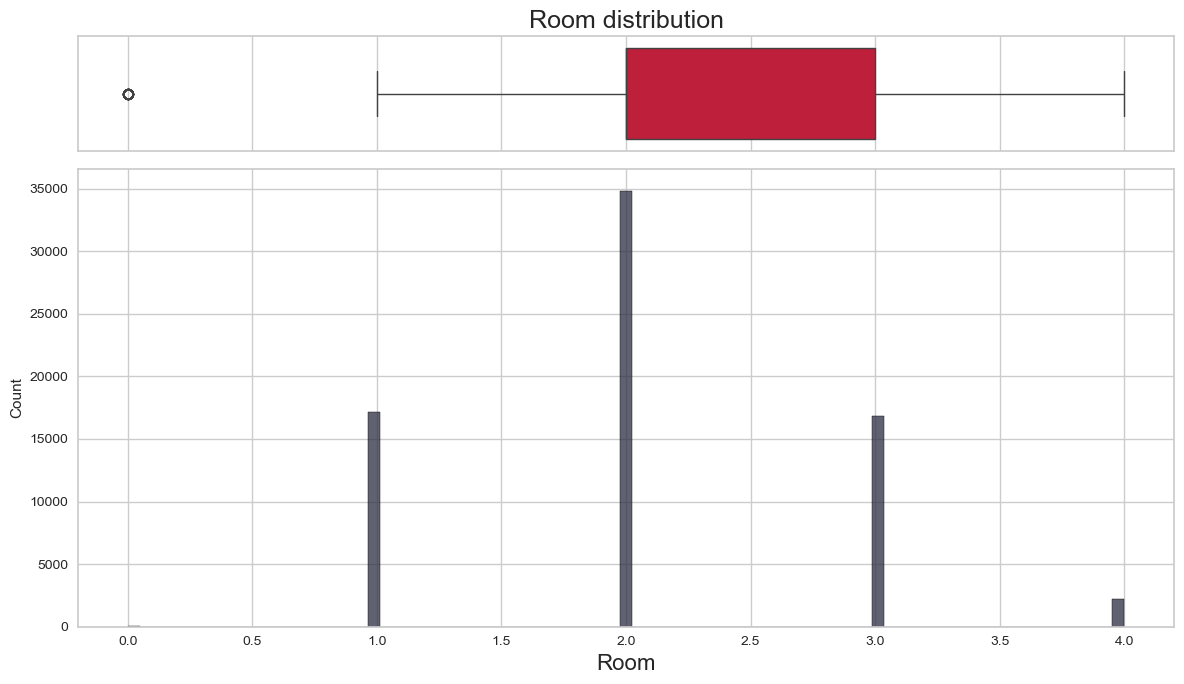

In [44]:
num_plots(df,'rooms','Room distribution','Room')

In [45]:
df['rooms'].value_counts(normalize=True)* 100

rooms
2    48.957074
1    24.102550
3    23.710398
4     3.097855
0     0.132123
Name: proportion, dtype: float64

* near 50 percentage of houses contain 2 rooms

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Parking</p>   


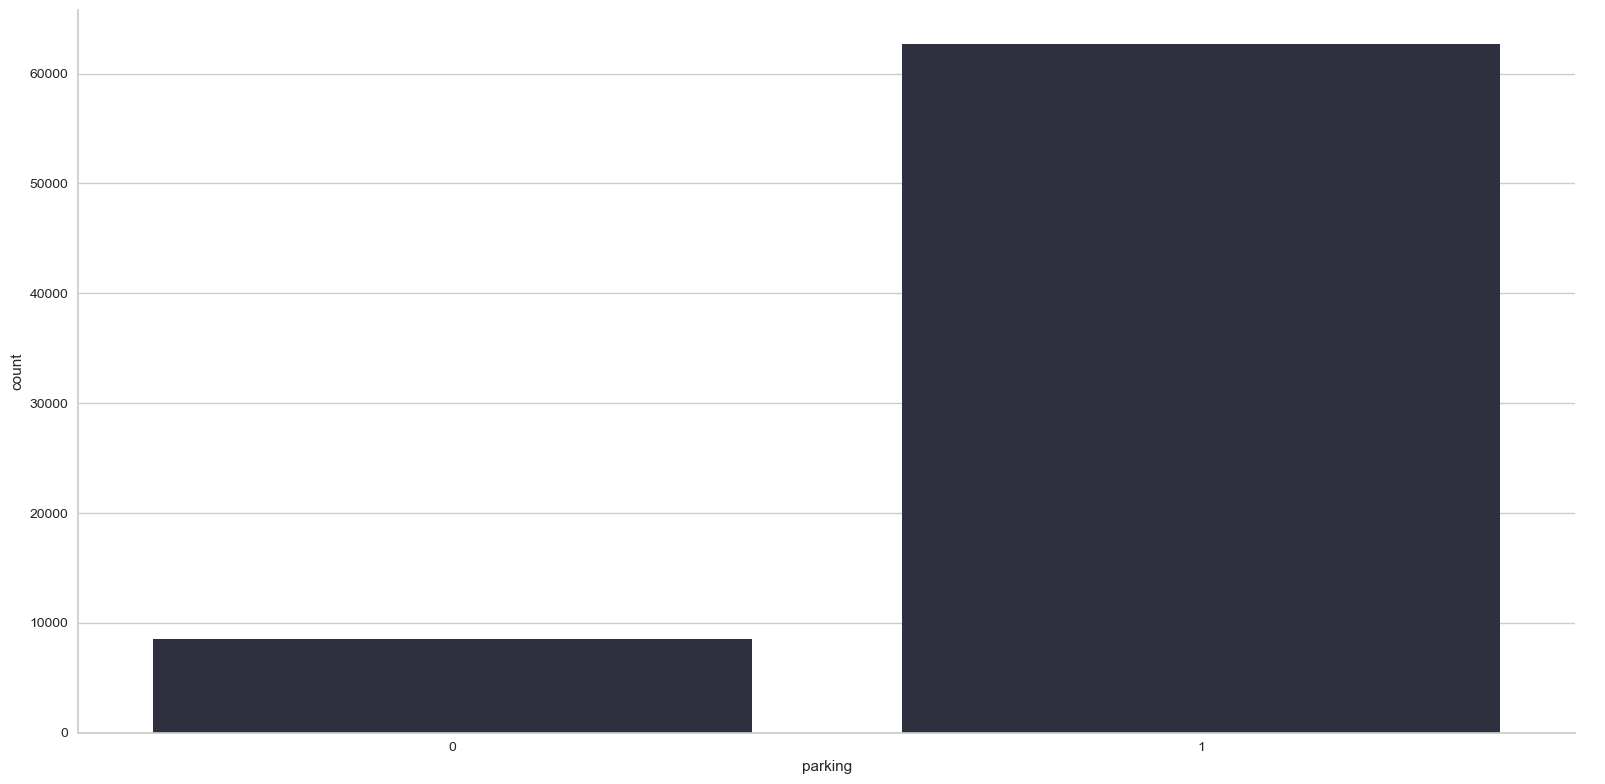

In [46]:
sns.catplot(x="parking", kind="count", data=df, height=8, aspect=2, color='#2b2d42')

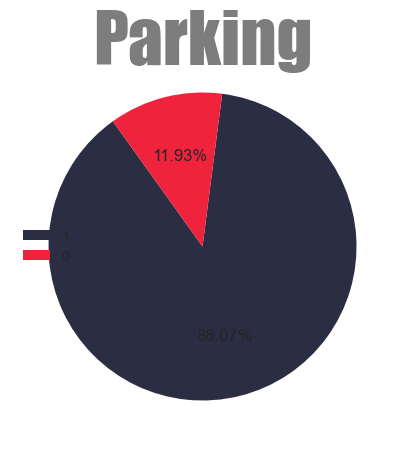

In [47]:
size =df.parking.value_counts().values
lbl=df.parking.value_counts().index
plt.figure(figsize=(6,5))
plt.title('Parking',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
colors = ['#2b2d42','#ef233c','#8d99ae','#edf2f4']
plt.pie(size ,startangle=125.6,autopct='%1.2f%%', colors=colors)
plt.legend(labels=lbl,loc='center left')
plt.show()

In [48]:
df['parking'].value_counts(normalize=True)* 100

parking
1    88.069603
0    11.930397
Name: proportion, dtype: float64

* most houses are having parking

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Warehouse</p>

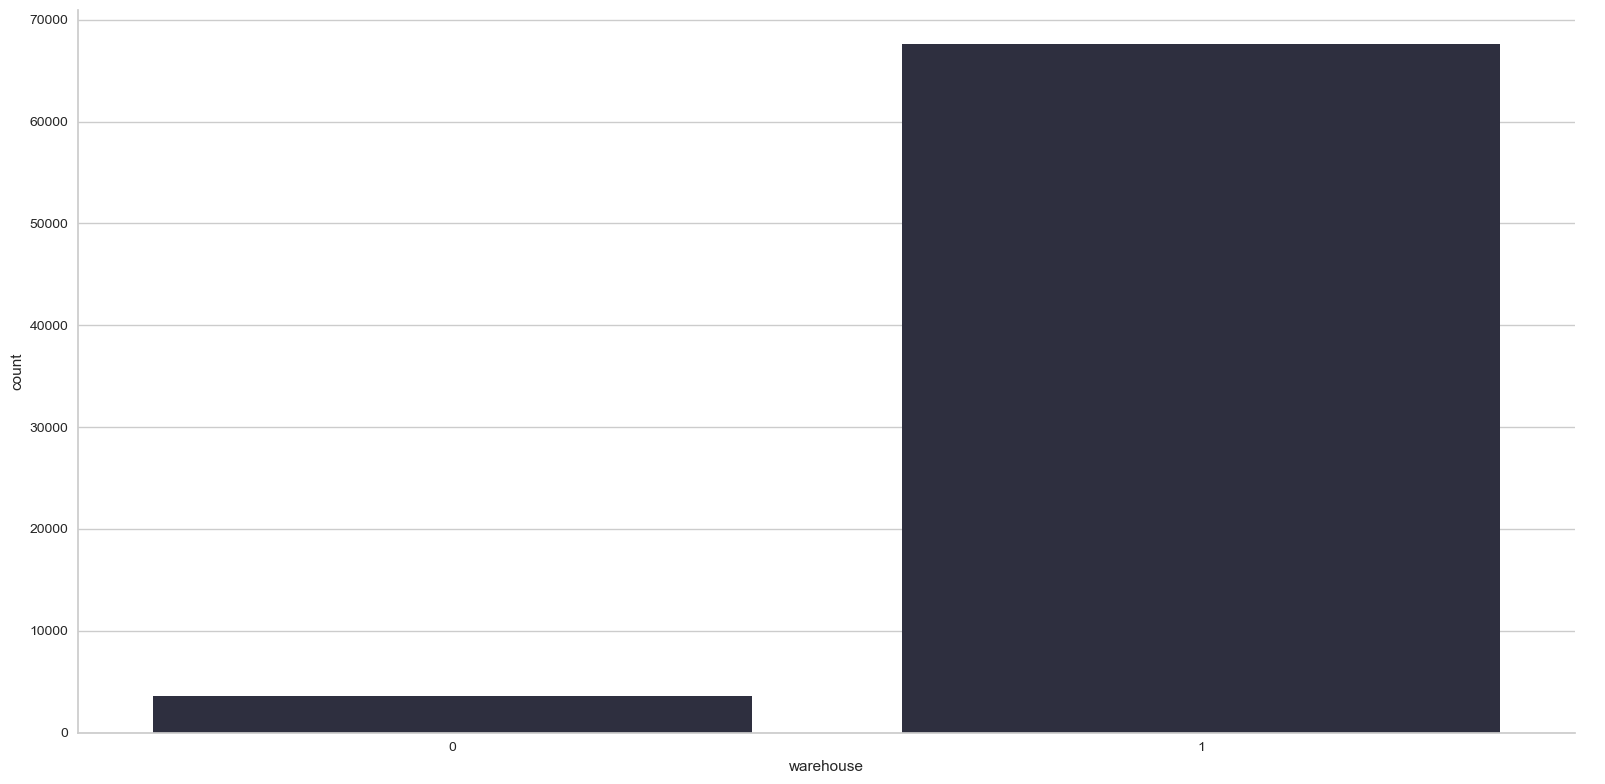

In [49]:
sns.catplot(x="warehouse", kind="count", data=df, height=8, aspect=2, color='#2b2d42')

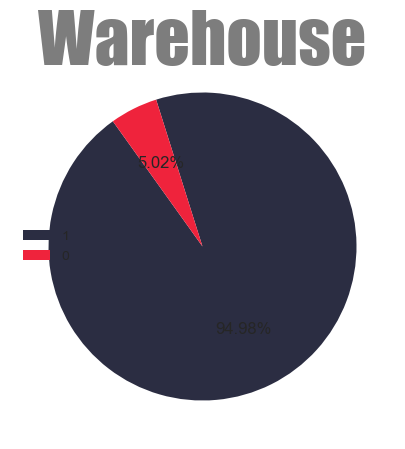

In [50]:
size =df.warehouse.value_counts().values
lbl=df.warehouse.value_counts().index
plt.figure(figsize=(6,5))
plt.title('Warehouse',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
colors = ['#2b2d42','#ef233c','#8d99ae','#edf2f4']
plt.pie(size ,startangle=125.6,autopct='%1.2f%%', colors=colors)
plt.legend(labels=lbl,loc='center left')
plt.show()

* over 90% of houses in dataset have warehouse

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Elevator</p>

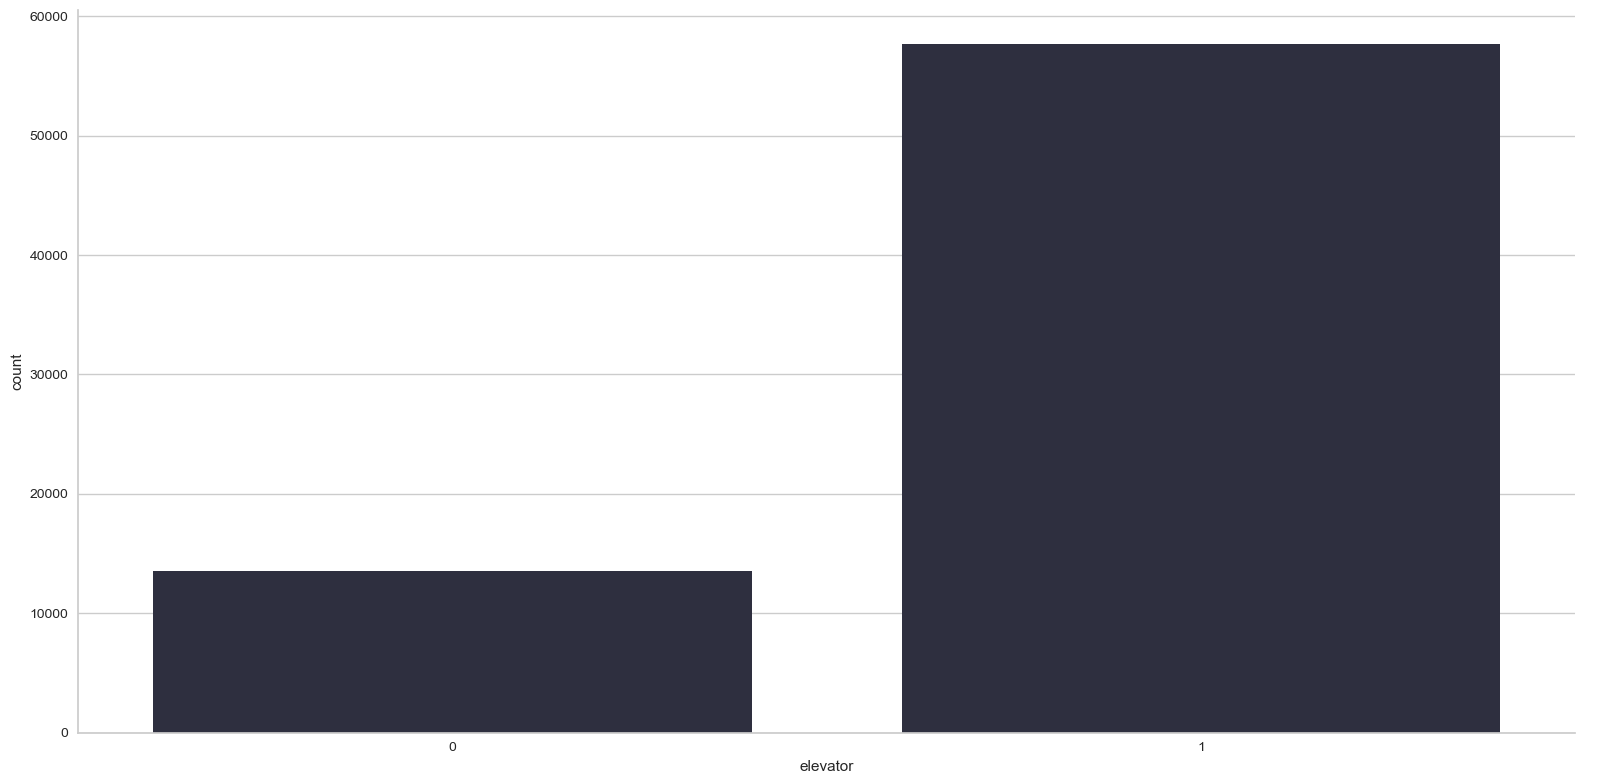

In [51]:
sns.catplot(x="elevator", kind="count", data=df, height=8, aspect=2, color='#2b2d42')

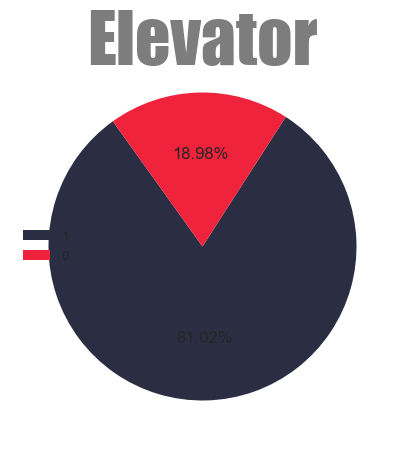

In [52]:
size =df.elevator.value_counts().values
lbl=df.elevator.value_counts().index
plt.figure(figsize=(6,5))
plt.title('Elevator',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
colors = ['#2b2d42','#ef233c','#8d99ae','#edf2f4']
plt.pie(size ,startangle=125.6,autopct='%1.2f%%', colors=colors)
plt.legend(labels=lbl,loc='center left')
plt.show()

* over 80% of houses have elavator

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Neighborhood</p>

Text(0.5, 1.0, 'neighborhood')

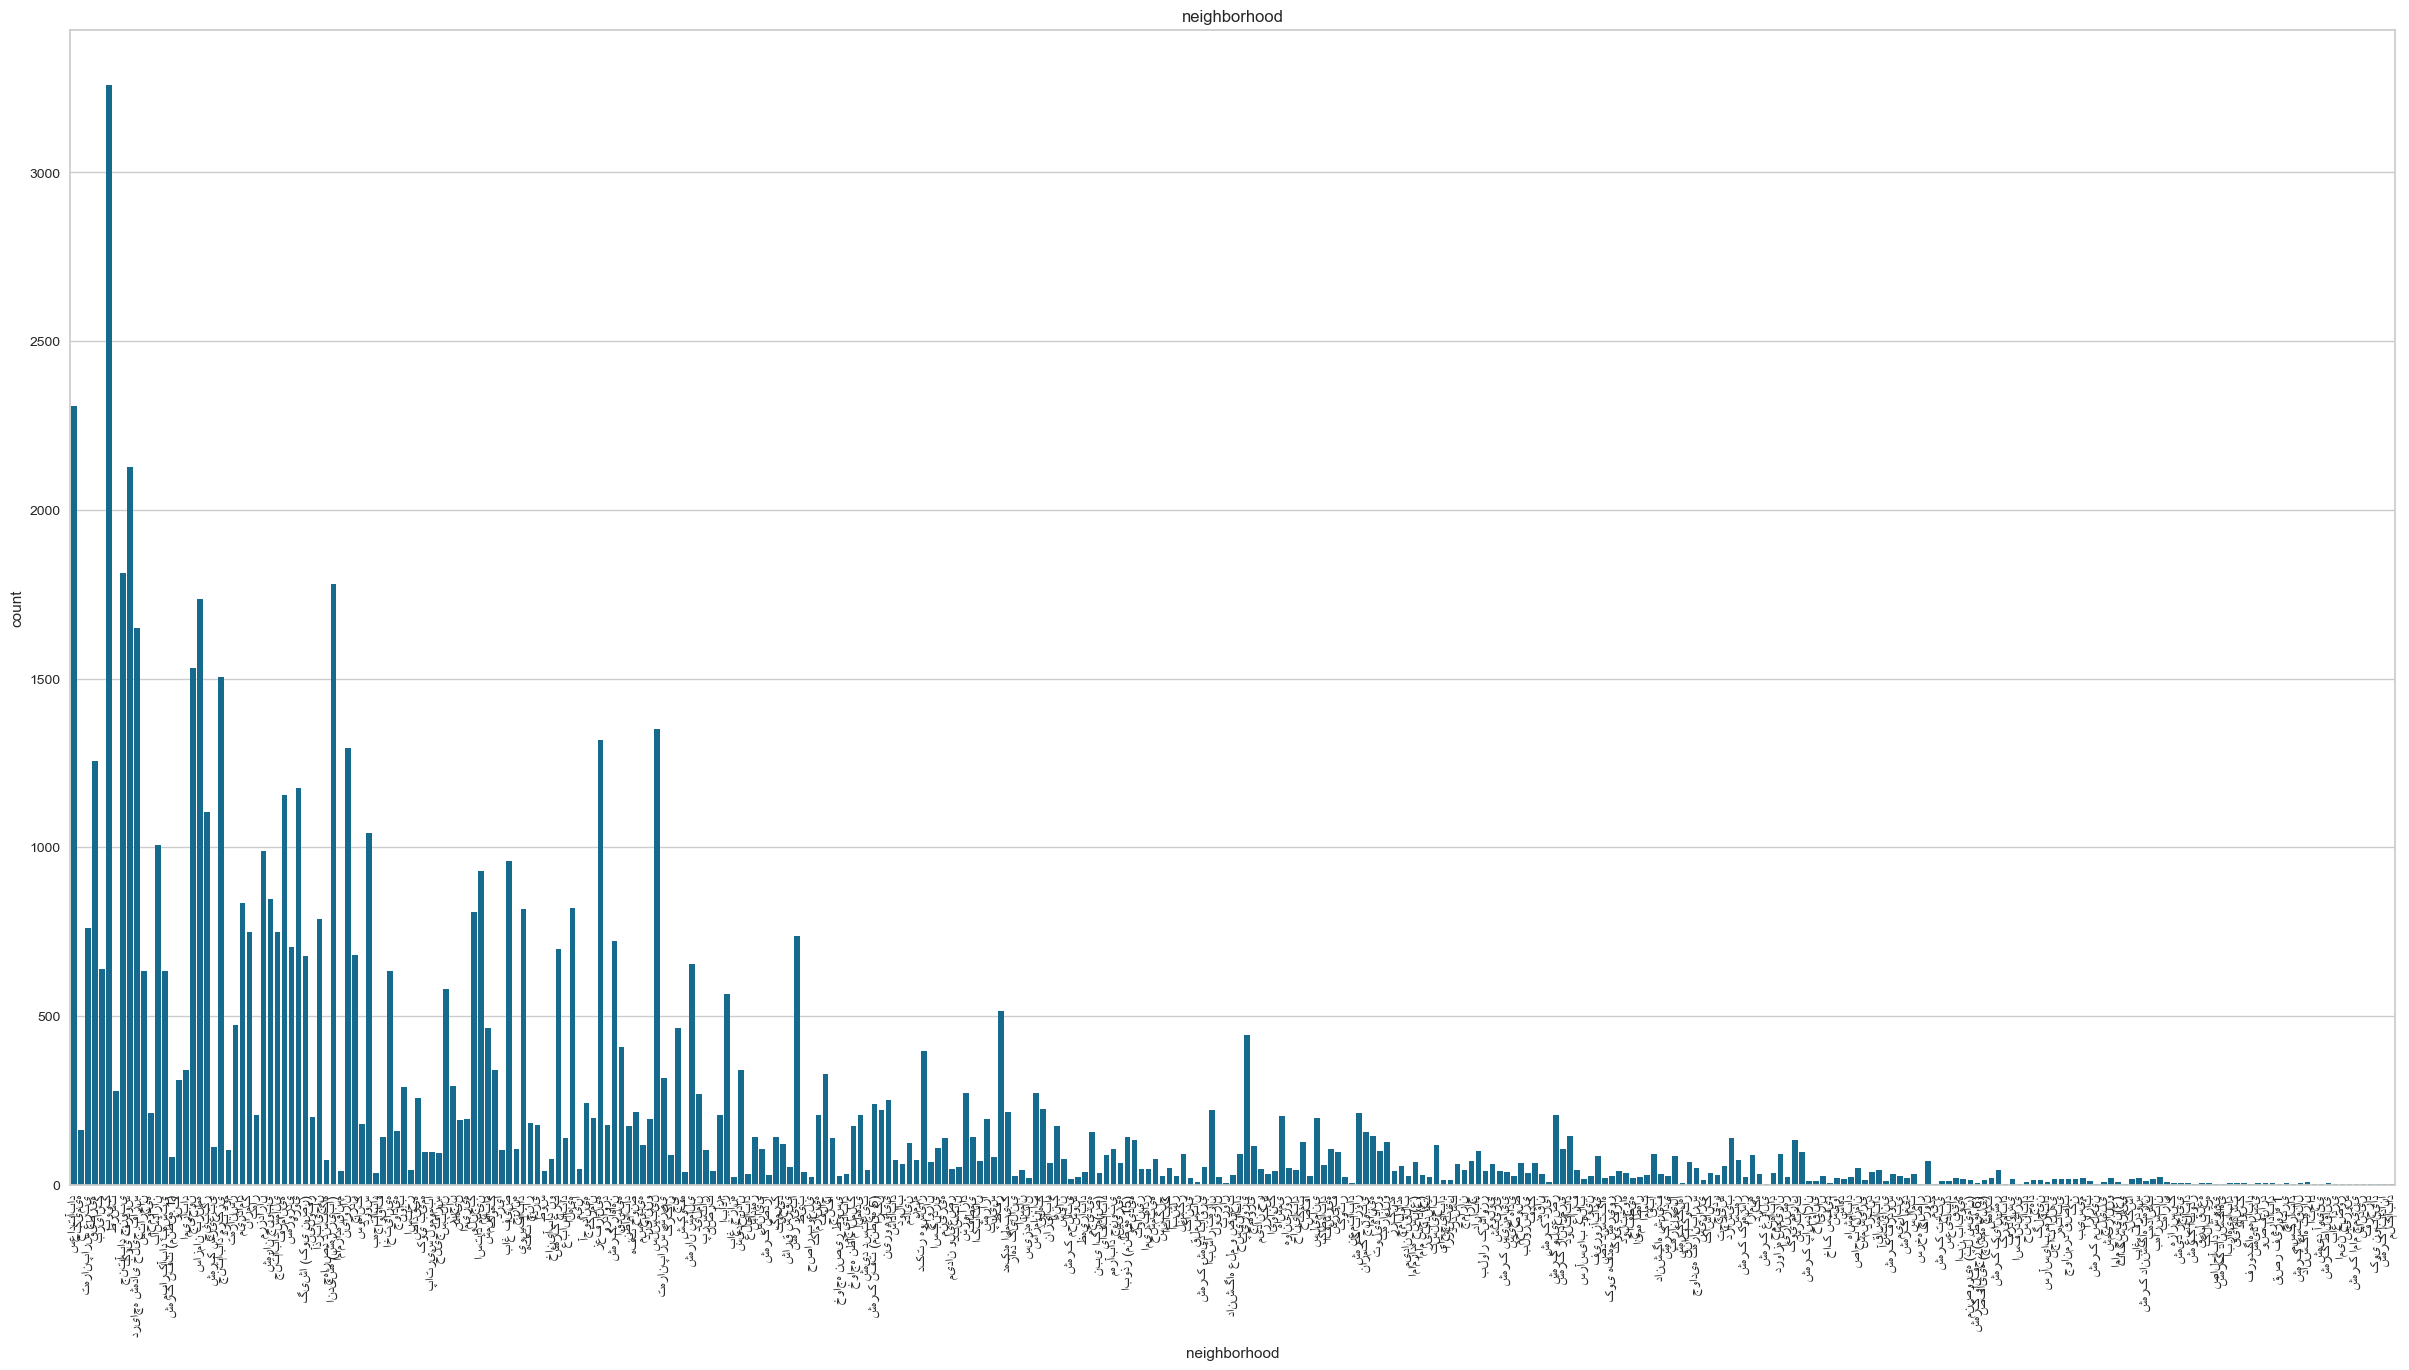

In [53]:
plt.figure(figsize=(30,15))
category_chart = sns.countplot(data=df, x='neighborhood')
plt.xticks(rotation=90)
category_chart.set_title('neighborhood')

In [54]:
pd.DataFrame(df['neighborhood'].value_counts())

,count
neighborhood,
پونک,3260
سعادت‌آباد,2307
کوی فردوس,2126
جنت‌آباد جنوبی,1812
اندیشه (شهر زیبا),1780
...,...
اسفندیاری,1
شهرک امام خمینی,1
فرحزاد,1


we see in the datasets that some neighborhoods too many low data rows so we came to conclusion that
#droping# them is best that we can

In [55]:
df_n = pd.DataFrame(df['neighborhood'].value_counts())

In [56]:
n_list = df_n[df_n['count'] < 10].index.tolist() # dropping all neighborhoods less then 10 rows

In [57]:
df.reset_index(inplace = True)

In [58]:
df = df.drop(columns= 'index')

In [59]:
df.shape[0]

71146

In [60]:
list_index_n = list()
for i in range(df.shape[0]):
    if df.iloc[i,0] in n_list:
        list_index_n.append(i)
df = df.drop(list_index_n)

In [61]:
pd.DataFrame(df['neighborhood'].value_counts())

,count
neighborhood,
پونک,3260
سعادت‌آباد,2307
کوی فردوس,2126
جنت‌آباد جنوبی,1812
اندیشه (شهر زیبا),1780
...,...
شهرک تختی,12
آرارات,10
خاقانی,10


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Area</p>

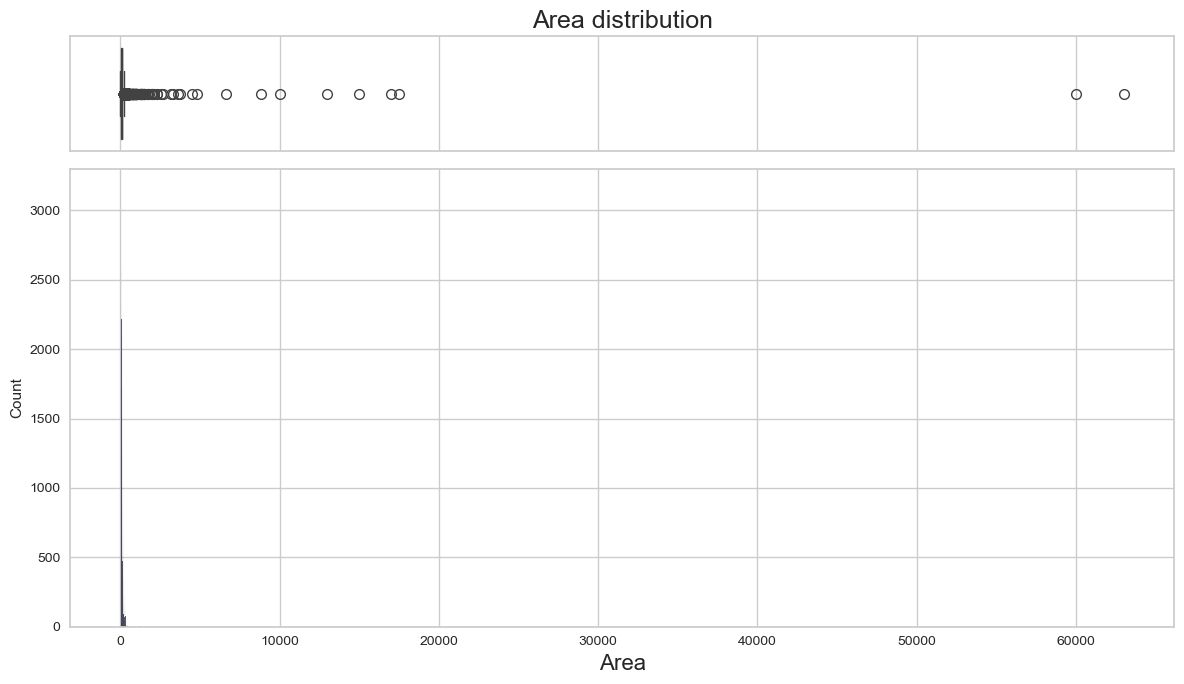

In [62]:
num_plots(df,'area','Area distribution','Area')

As you we have some biiig outliers. Let's drop them

In [63]:
df = df[df["area"]<300] # working with just under 300 m^2 houses would be better and more accurate

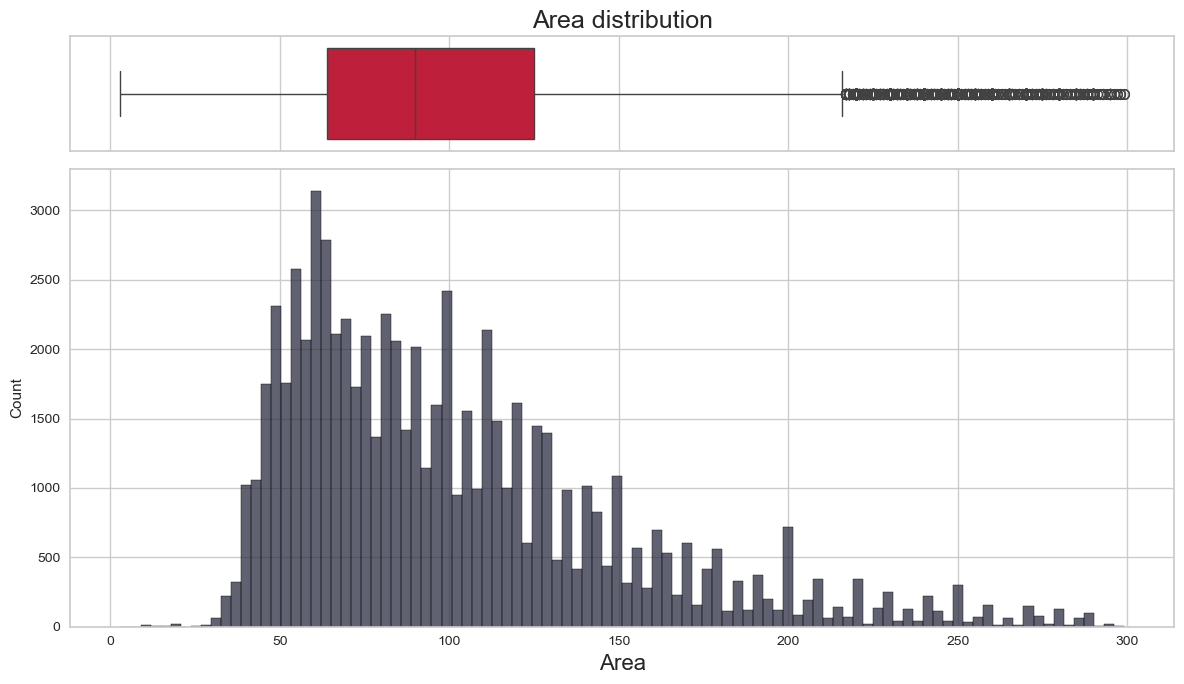

In [64]:
num_plots(df,'area','Area distribution','Area')

we better drop under 40 m^2 houses too

In [65]:
df = df[df["area"]>40]

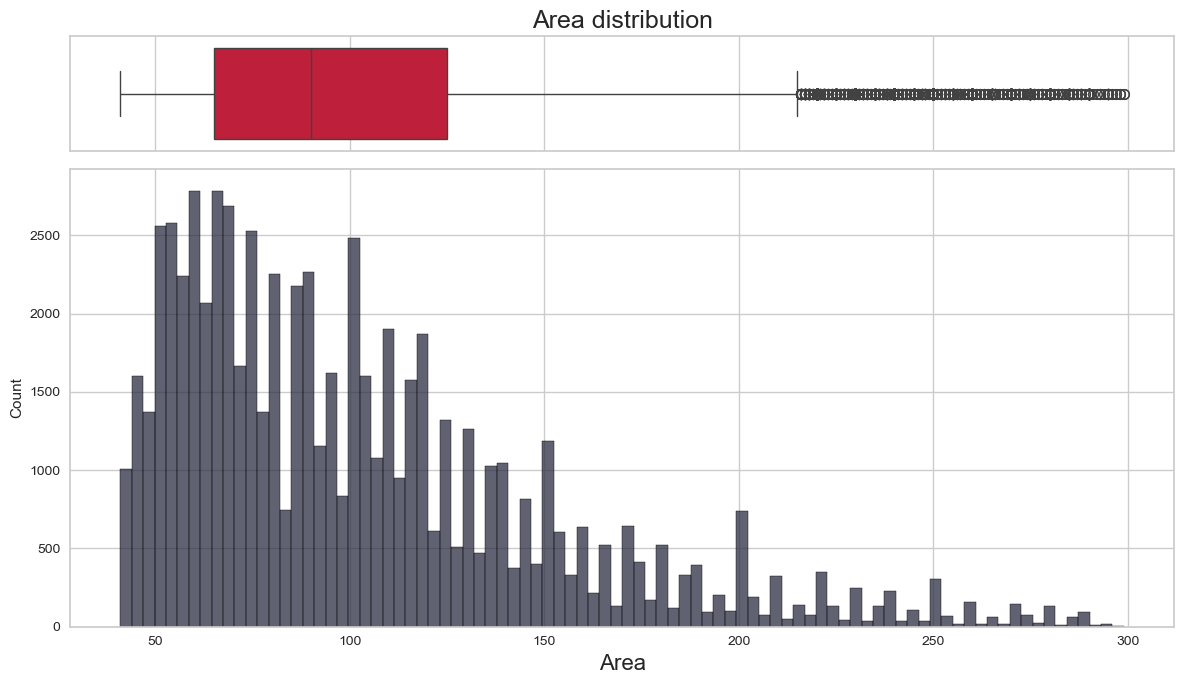

In [66]:
num_plots(df,'area','Area distribution','Area')

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Visualization</p>

<Axes: >

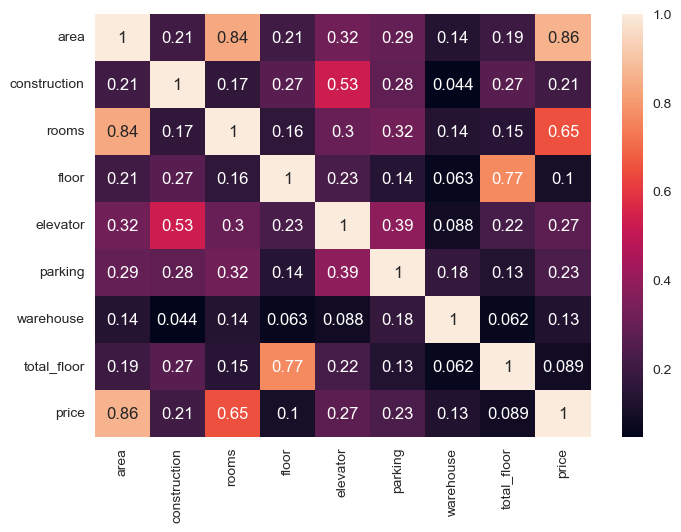

In [67]:
sns.heatmap(df.iloc[:,1:].corr() , annot=True)

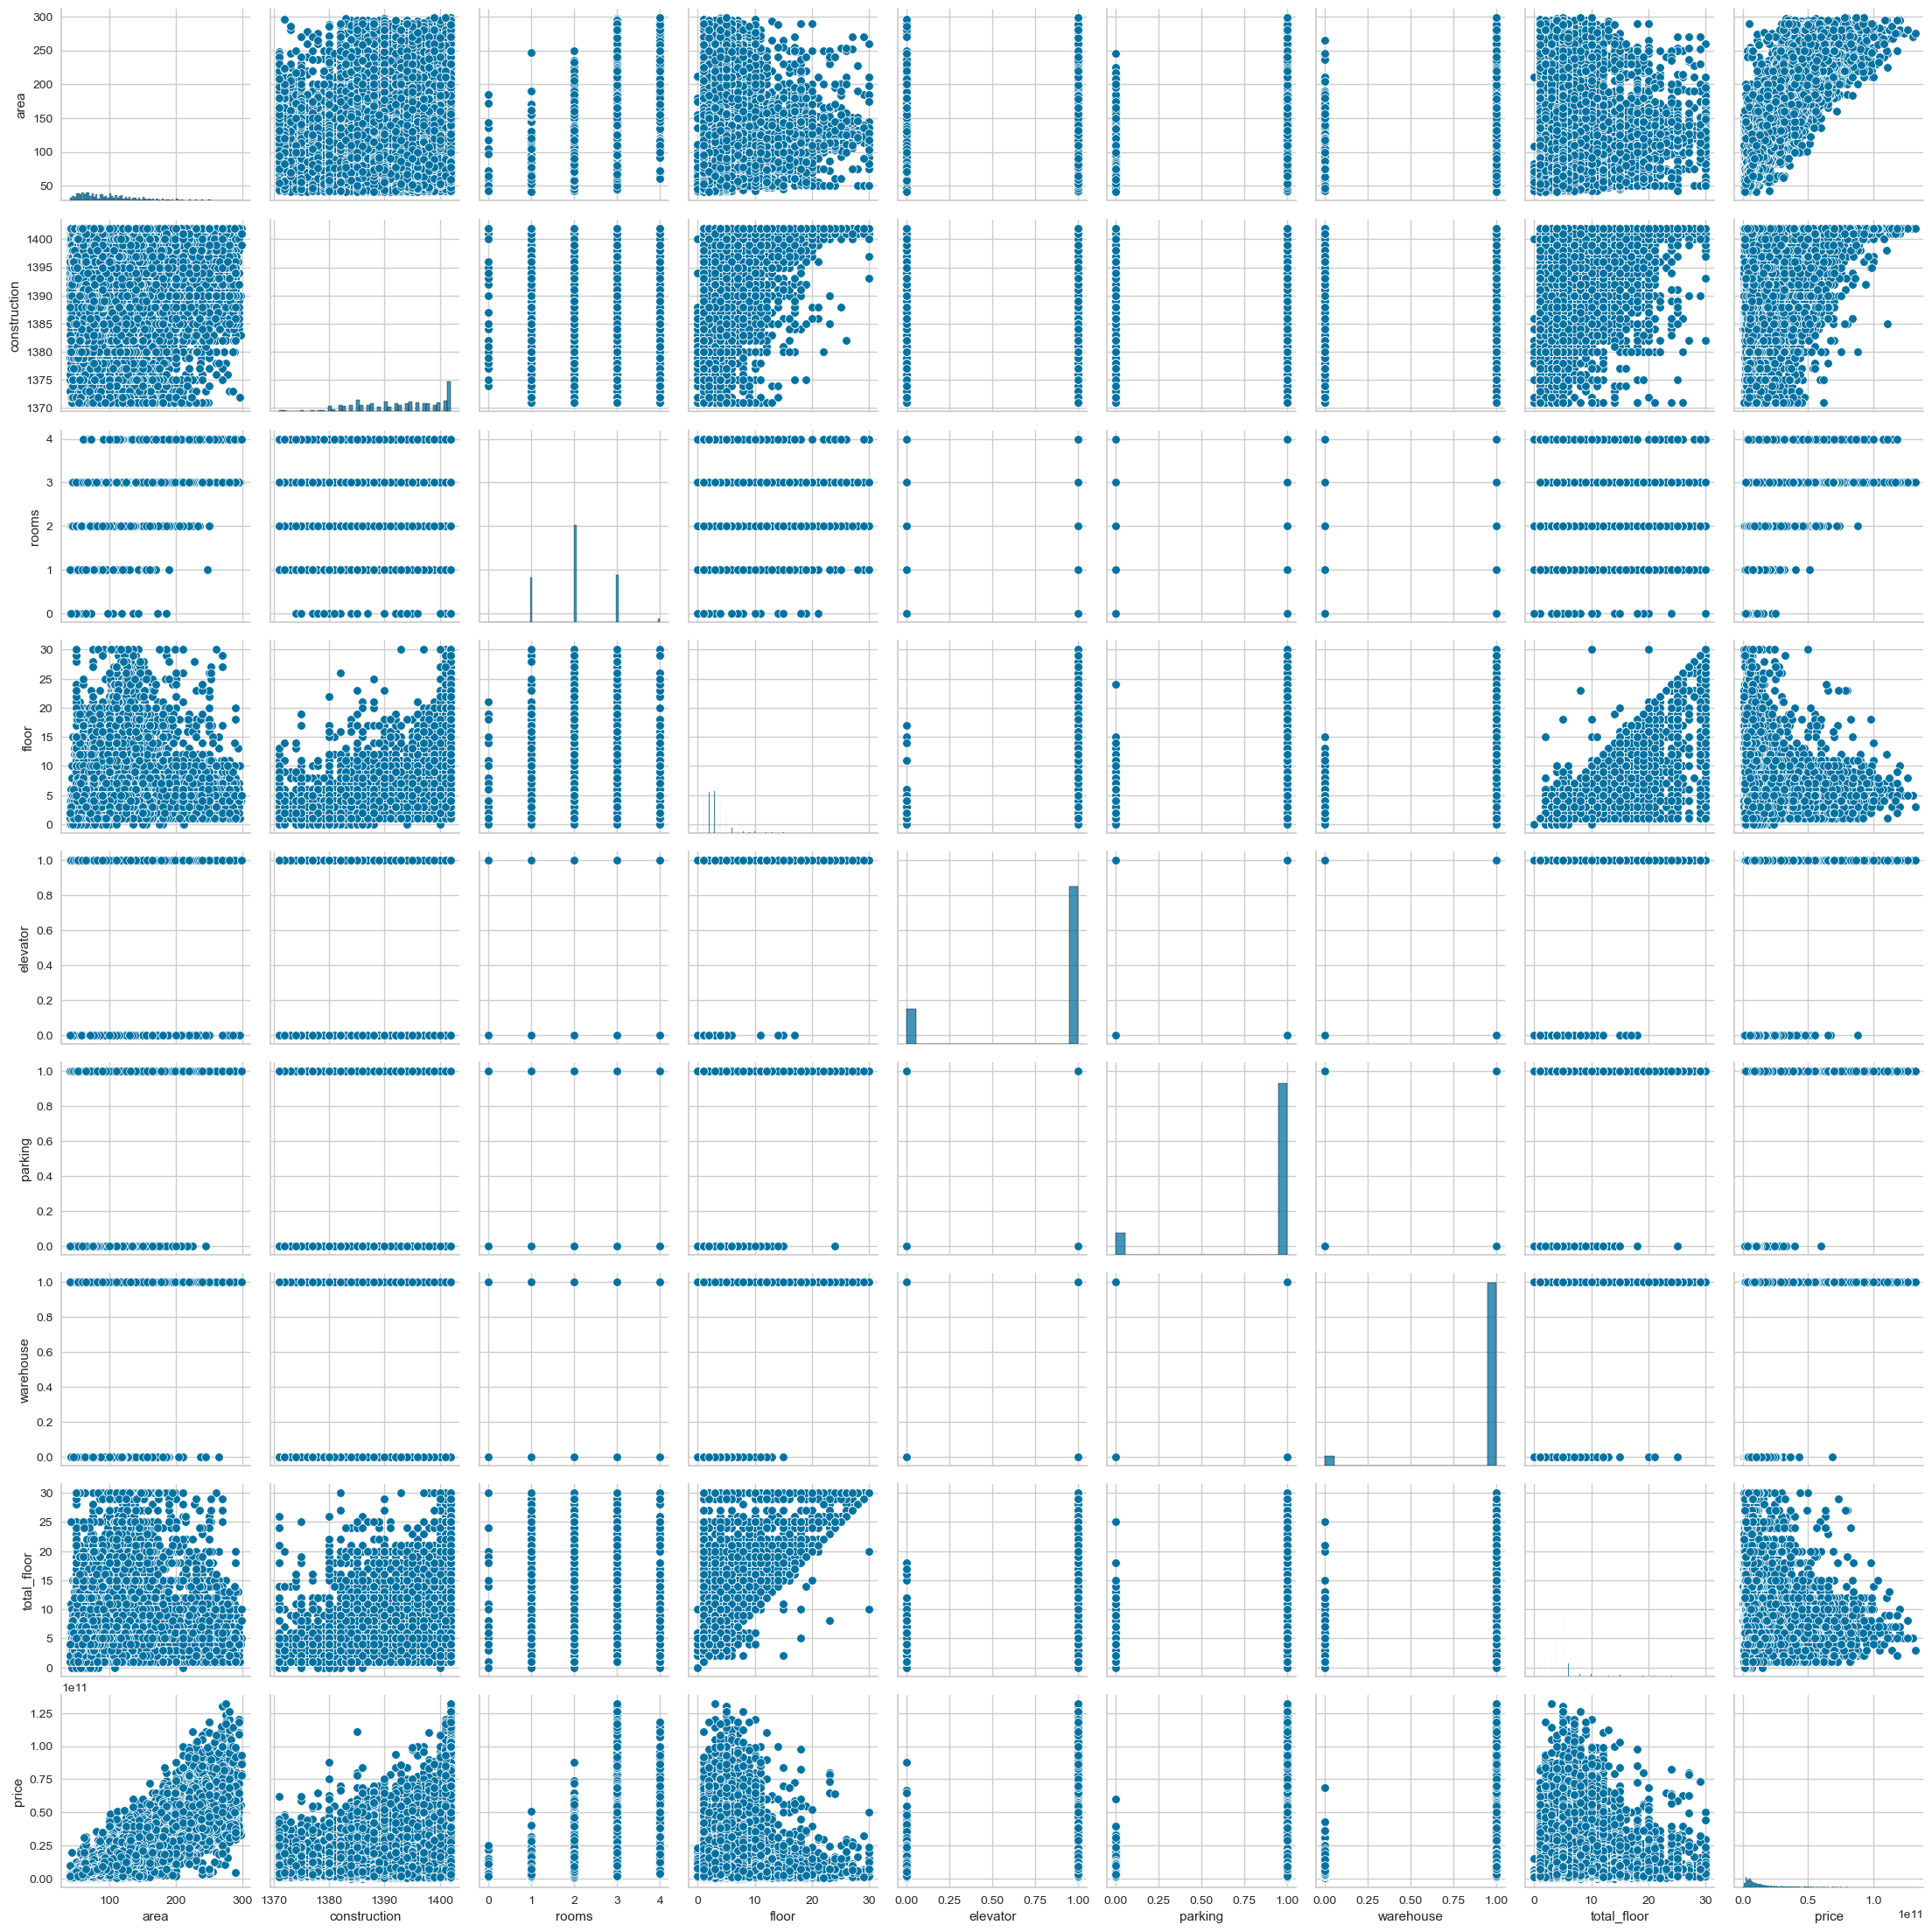

In [68]:
sns.pairplot(df.iloc[:,1:])

Text(0, 0.5, 'Price(Toman)')

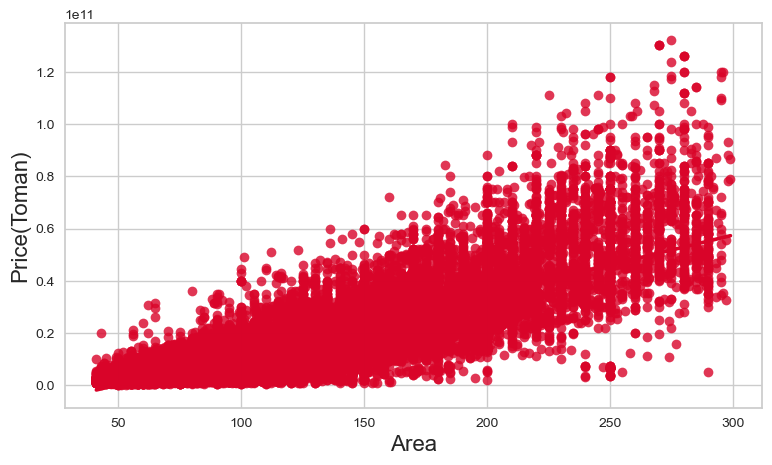

In [69]:
plt.figure(figsize=(9,5))


sns.regplot(x="area", y="price", data=df, color='#d90429')
plt.xlabel( 'Area', fontsize=16)
plt.ylabel( 'Price(Toman)', fontsize=16)


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Modeling</p>

In [70]:
df = pd.get_dummies(df, columns=['neighborhood'], dtype=int)
df

,area,construction,rooms,floor,elevator,parking,warehouse,total_floor,price,neighborhood_ آبشار,...,neighborhood_ کوی مهران,neighborhood_ کوی هفدهم شهریور,neighborhood_ گاندی,neighborhood_ گرگان,neighborhood_ گلچین,neighborhood_ گمرک,neighborhood_ گیشا (کوی نصر),neighborhood_ یاخچی‌آباد,neighborhood_ یافت‌آباد,neighborhood_ یوسف‌آباد
0,260,1400,4,5,1,1,1,5,56000000000,0,...,0,0,0,0,0,0,0,0,0,0
1,59,1399,1,5,1,1,1,5,4425000000,0,...,0,0,0,0,0,0,0,0,0,0
2,147,1397,3,3,1,1,1,5,13000000000,0,...,0,0,0,0,0,0,0,0,0,0
3,80,1384,2,1,1,1,1,5,8500000000,0,...,0,0,0,0,0,0,0,0,0,0
4,52,1385,1,3,0,0,1,4,2280000000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71141,59,1402,1,4,1,0,1,4,3451700000,0,...,0,0,0,0,0,0,0,0,0,0
71142,81,1398,2,1,1,1,1,1,7500000000,0,...,0,0,0,0,0,0,0,0,0,0
71143,132,1399,2,4,1,1,1,4,29070000000,0,...,0,0,0,0,0,0,0,0,0,0
71144,65,1396,1,3,1,1,1,5,7600000000,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = df.drop(columns=['price'])
Y = df[['price']]

X = sm.add_constant(X)
model_OLS = sm.OLS(Y ,X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1423.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        01:46:21   Log-Likelihood:            -1.6230e+06
No. Observations:               68381   AIC:                         3.247e+06
Df Residuals:                   68093   BIC:                         3.249e+06
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


at first try we get 85% R-squared. let's do some more cleaning.

#### at Area-Price chart we see some so big numbers for price. we shoud drop them too

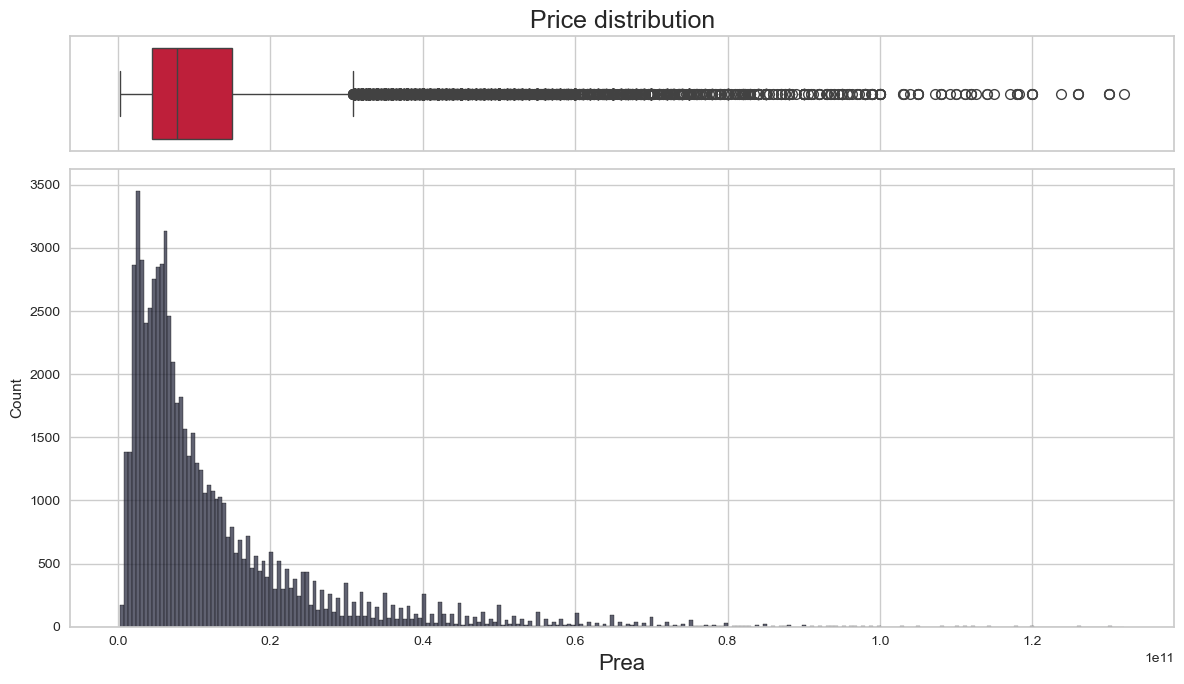

In [75]:
num_plots(df,'price','Price distribution','Prea')

In [76]:
df.price.max()

132000000000

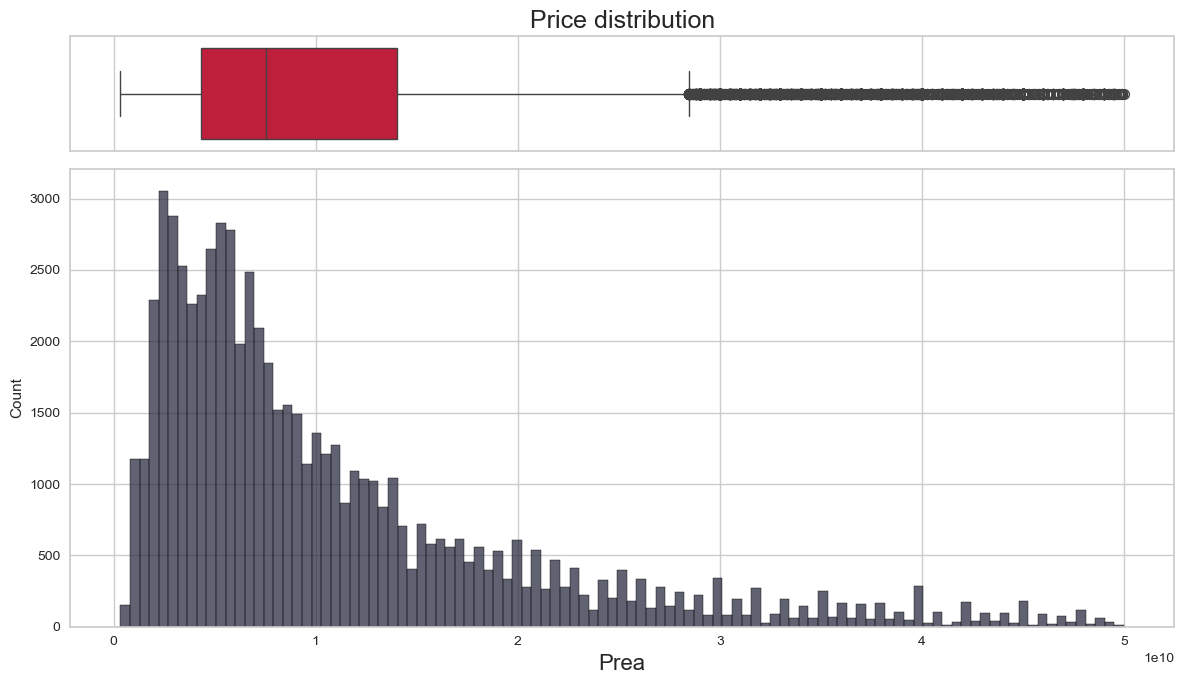

In [77]:
num_plots(df[df['price']<50000000000 ],'price','Price distribution','Prea') # lower then 50.000.000.000

In [78]:
df = df[df['price']<50000000000 ] # lower then 50.000.000.000

<Figure size 1200x800 with 0 Axes>

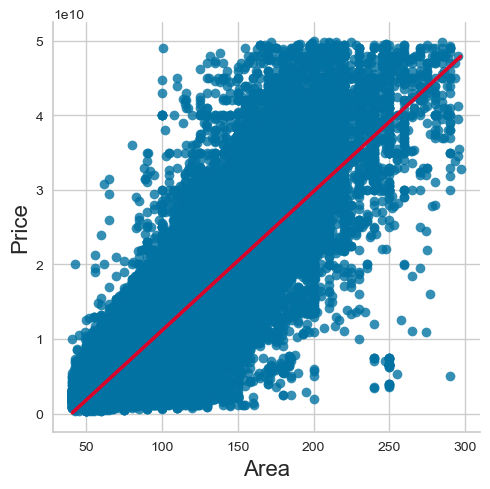

In [84]:
plt.figure(figsize=(12,8))
sns.lmplot(x="area", y="price", data=df, line_kws={'color': '#d90429'})
plt.xlabel('Area', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()

In [79]:
X = df.drop(columns=['price'])
Y = df[['price']]

X = sm.add_constant(X)
model_OLS = sm.OLS(Y ,X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:15:15   Log-Likelihood:            -1.5504e+06
No. Observations:               66508   AIC:                         3.101e+06
Df Residuals:                   66220   BIC:                         3.104e+06
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [80]:
y_pre = model_OLS.predict(X)
residual= (Y.T - y_pre).T

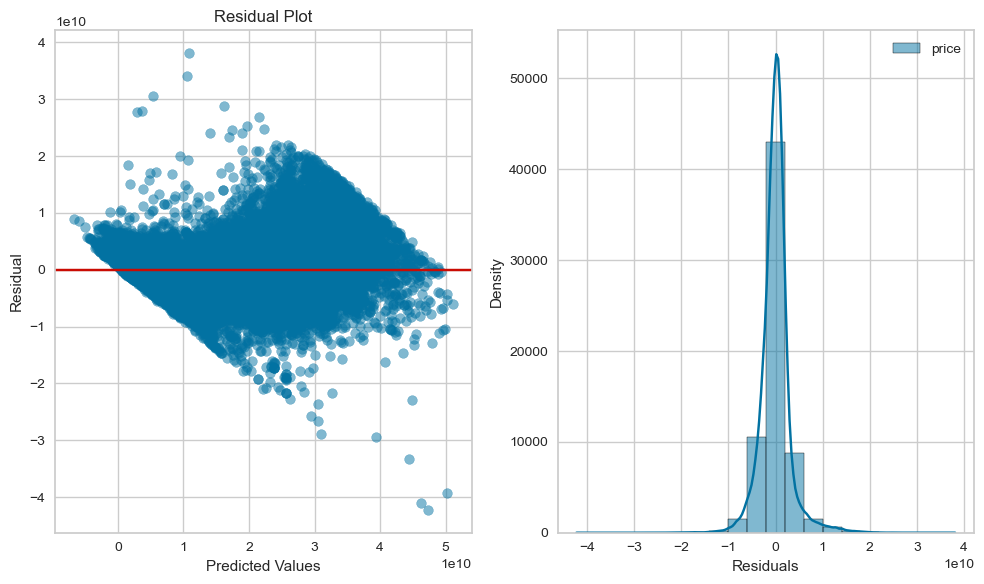

In [81]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(y_pre, residual, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')

plt.subplot(1,2,2)
sns.histplot(residual, kde=True, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [82]:
dg.het_goldfeldquandt (Y, X, drop = 0.20)

(0.933681136532019, 0.9999999669144236, 'increasing')

Now it's time to check the VIF of Xk 

In [83]:
counter = 1
for i in X.columns:
    if i == 'const':
        continue
    elif counter == 9:
        break
    else:
        X_target = X[[i]]
        X_dep = X.drop(columns= i)
        res = sm.OLS(X_target ,X_dep).fit()
        VIF = 1/ (1 - res.rsquared)
        print("VIF for {} is".format(i), VIF)
    counter += 1

VIF for area is 4.50395521620184
VIF for construction is 1.6969797989210593
VIF for rooms is 3.598045533055388
VIF for floor is 2.5868449655914354
VIF for elevator is 1.7671081372079962
VIF for parking is 1.4155610544520378
VIF for warehouse is 1.152887979810091
VIF for total_floor is 2.902475048194166


#### none of them are above 10
#### -----------------------------------------------------------------------------------

Now let's do some more of modeling.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
regressor = RandomForestRegressor(n_estimators=200,     # Number of trees in the forest
                                   max_depth=None,      # Maximum depth of the trees
                                   max_features='sqrt', # Number of features to consider when looking for the best split
                                   random_state=0)

regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=0)

In [87]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

print('R^2 for train:', r2_score(y_train, y_pred_train))
print('R^2 for test:', r2_score(y_test, y_pred_test))

R^2 for train: 0.9886006247042644
R^2 for test: 0.9255669898891894


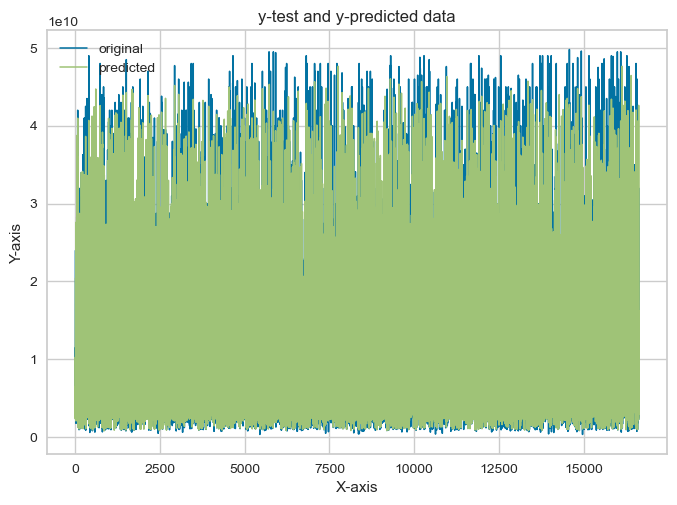

In [88]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1.1, label="original")
plt.plot(x_ax, y_pred_test, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

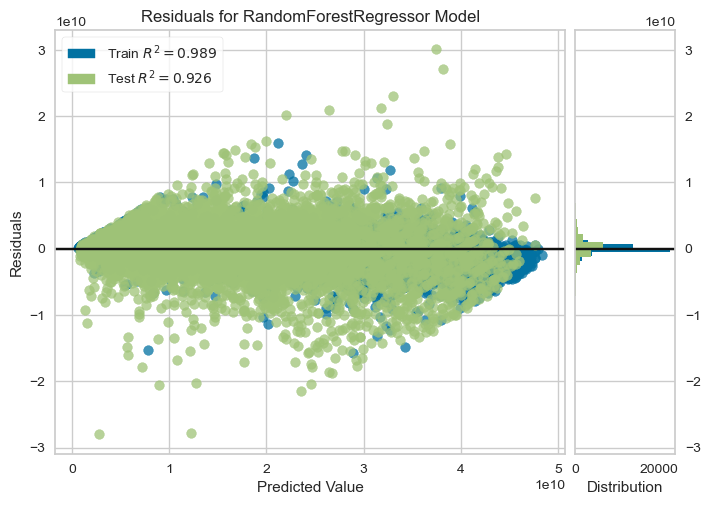

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [89]:
visualizer = ResidualsPlot(regressor)
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test.values.ravel())

visualizer.show()

<style>
    /* Header styling */
    h2 {
        font-size: 60px;
        color: green;
        text-align: center;
    }

  

    /* Positive points styling */
    .positive-points {
        margin-top: 20px;
    }
    p {
        font-size: 20px;
    }
    .positive-points h3 {
        color: #007bff;
    }
</style>

<div class="text-container">
    <h2> نتیجه گیری </h2>

<div dir="rtl">
<p>
در انتها به اهمیت ساخت این مدل رگسیونی می‌پردازیم. بازار خودرو و مسکن در ایران هر دو از بازار های پر طرفدار می‌باشند. در بازار خودرو چندین استارت آپ برآورد و پیشبینی قیمت مانند سایت کارنامه وجود دارد که با وارد کردن مشخصات و ویژگی های خودرو، به فروشنده یا خریدار بازه قیمتی مناسب را ارائه میدهد. حال به اهمیت این موضوع، ما در مدل رگرسیونی به برآورد قیمتی مسکن به همان روش پرداختیم.
در نهایت این مدل به فروشنده و یا خریدار کمک میکند تا بازه قیمتی مناسب مسکن را پیدا کرده، و با انتخاب قیمتی مناسب به فروش و یا خرید مسکن با دقت بالا تری بپردازد.
</p>
</div>

<div dir="rtl">
برخی از نکات مثبت محصول:


1-خریداران آپارتمان:
  به خریداران احتمالی کمک می‌کند تا ارزش بازار املاکی را که به آن‌ها علاقه‌مند هستند درک کنند. خریداران را قادر می‌سازد تا تصمیم‌گیری آگاهانه در مورد قیمت منصفانه ملک یا پرداخت بیش از حد آن‌ها اتخاذ کنند. به خریداران این امکان را می‌دهد که بودجه‌های واقعی را تنظیم کرده و دارایی‌ها را در محدوده قیمتی خود اولویت‌بندی کنند.

2-فروشندگان آپارتمان:
به فروشندگان کمک می کند تا قیمت مناسبی را برای ملک خود بر اساس روندهای فعلی بازار و فروش قابل مقایسه تعیین کنند.
به فروشندگان کمک می کند تا از ارزش گذاری کمتر دارایی خود اجتناب کنند و اطمینان حاصل شود که غرامت عادلانه برای سرمایه گذاری خود دریافت می کنند.
با جذب خریداران بالقوه با لیست قیمت دقیق، روند فروش را سرعت می بخشد.

3-کارگزاران املاک:
بینش های مبتنی بر داده را به نمایندگان ارائه می دهد تا به مشتریان خود در مورد استراتژی های قیمت گذاری مشاوره دهند. با ارائه تحلیل های دقیق بازار و توصیه های قیمت گذاری، اعتبار و تخصص نمایندگان را افزایش می دهد.
با خودکار کردن فرآیند تحقیق در مورد خواص قابل مقایسه و انجام ارزیابی های بازار در زمان صرفه جویی می کند.

4-سرمایه گذاران:
به سرمایه گذاران کمک می کند تا بازده سرمایه گذاری بالقوه (ROI) را برای املاک مختلف ارزیابی کنند. سرمایه گذاران را در شناسایی املاک کم ارزشی که پتانسیل قدردانی دارند، راهنمایی می کند. به سرمایه گذاران اجازه می دهد هنگام خرید ملک برای درآمد اجاره یا فروش مجدد تصمیمات مبتنی بر داده اتخاذ کنند.

5- برنامه ریزی مالی:
افراد را قادر می سازد تا پرداخت های وام مسکن خود را بر اساس قیمت ملک و نرخ بهره تخمین بزنند. با گنجاندن هزینه های مسکن در محاسبات بودجه به برنامه ریزی مالی بلندمدت کمک می کند. به افراد کمک می کند تا مقرون به صرفه بودن مالکیت خانه را ارزیابی کرده و آن را با اجاره مقایسه کنند.

6-تحلیل بازار:
داده های ارزشمندی را برای متخصصان املاک، اقتصاددانان و سیاست گذاران برای تجزیه و تحلیل روند بازار مسکن فراهم می کند. تحقیق در مورد تغییرات منطقه ای در قیمت ملک و عوامل موثر بر تقاضا و عرضه مسکن را تسهیل می کند. از تلاش‌های برنامه‌ریزی شهری با شناسایی مناطقی با مسائل مربوط به مقرون به صرفه بودن مسکن یا پتانسیل توسعه حمایت می‌کند.

</div>


###                               ----------------------------------         the end           ----------------------------------